<a href="https://colab.research.google.com/github/Mateoswiatek/Bayesian_classifier_and_networks-/blob/main/BNLab2023_Mateusz_Swiatek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Na początek spróbujemy samodzielnie utworzyć prosty klasyfikator dla naiwnego Bayes'a. Struktura Danych wejściowych jest następująca: Mamy listę w której zawarte są dane wejściowe tej samej długości. Pierwsze n-1 pozycji zajmują wartości atrybutów danego obiektu (dla uproszczenia przyjmują one jedynie wartości 0 i 1), ostatnia pozycja zawiera jego klasę. Chcemy utworzyć słownik, który jako klucz będzie przyjmował pojawiające się wartości klasy, zaś elementami będą listy które będą zliczać ile razy pojawiło się 1 w danej klasie na swoich pierwszych n-1 pozycjach, zaś na ostatniej będą zliczać ile obiektów w sumie należało do danej klasy. To wystarczy na potrzeby naszego prostego klasyfikatora.

In [1]:
def NaiveBayesNauka(lista):

  wyjście={}

  for i in lista:

    if i[-1] in wyjście.keys():
        temp = wyjście.get(i[-1])

        for j in range(len(i)-1):
            temp[j]+=i[j]
        temp[-1]+=1

    else:
      temp = i[0:len(i)-1]
      temp.append(1)
      wyjście.update({i[-1] : temp})

  return wyjście

Mając juz taki prosty słownik możemy utworzyć klasyfikator który wyliczy do jakiej klasy należy przypisać nowy element.

In [5]:
def NaiveBayesKlasyfikuj(NauczonyBayes, nowyElement):
# 1 -> + - -
# 2 -> + - =

  samplesize = 0
  best = ""
  bestvalue = -1

  for key in NauczonyBayes.keys():
    samplesize += NauczonyBayes.get(key)[-1]
    # samplesize += NauczonyBayes[key][-1]
    # tu zliczamy rozmiar całego zbioru treningowego

  for key in NauczonyBayes.keys():
    temp = NauczonyBayes.get(key)
    newvalue=temp[-1]/samplesize

    for i in range(len(temp) - 1):
      if nowyElement[i] == 1:
        newvalue *= temp[i] / temp[-1]
      else:
        newvalue *= (temp[-1] - temp[i]) / temp[-1]

    # czy nowa wartosc jest wieksza od best value, jesli tak, to zamieniamy
    if newvalue > bestvalue:
      best = key
      bestvalue = newvalue

    #tu dla każdego klucza zliczamy wartość jaką nadaje mu klasyfikator. Jeżeli jest większa od aktualnego bestvalue należy podmienić wartość best na sprawdzany klucz oraz best value na otrzymany wynik.
    #Pierwsza wartość w iloczynie (prawdopodobieństwo należenia do klasy na podstawie zbioru treningowego) została już przypisana

  return best

In [2]:
# Stara wersja, nie uzywana:
def NaiveBayesKlasyfikujOld(NauczonyBayes, nowyElement):
# 1 -> + - -
# 2 -> = - =

  samplesize = 0
  best = ""
  bestvalue = -1

  for key in NauczonyBayes.keys():
    samplesize += NauczonyBayes.get(key)[-1]
    # samplesize += NauczonyBayes[key][-1]
    # tu zliczamy rozmiar całego zbioru treningowego

  for key in NauczonyBayes.keys():
    temp = NauczonyBayes.get(key)
    newvalue=temp[-1]/samplesize

    # iloczxyn prawdopodobieństwa dla nowego klucza (w tmp)
    # for j in temp[0:len(temp)-1]:
    #   newvalue *= (temp[j]/samplesize)

    for i in range(len(nowyElement) - 1):
      if nowyElement[i] == 1:
        newvalue *= temp[i] / temp[-1]
      else:
        newvalue *= (temp[-1] - temp[i]) / temp[-1]

    # czy nowa wartosc jest wieksza od best value, jesli tak, to zamieniamy
    if newvalue > bestvalue:
      best = key
      bestvalue = newvalue

    #tu dla każdego klucza zliczamy wartość jaką nadaje mu klasyfikator. Jeżeli jest większa od aktualnego bestvalue należy podmienić wartość best na sprawdzany klucz oraz best value na otrzymany wynik.
    #Pierwsza wartość w iloczynie (prawdopodobieństwo należenia do klasy na podstawie zbioru treningowego) została już przypisana

  return best

korzystając z utworzonych funkcji sprawdź teraz ich działanie na dwóch zbiorach treningowych. Zbiór pierwszy:

In [6]:
trening1 =[[1,1,1,1,"+"],
          [1,1,0,1,"+"],
          [0,1,1,0,"+"],
          [1,0,0,1,"+"],
          [1,0,0,0,"+"],
          [1,0,1,0,"-"],
          [0,1,0,0,"-"],
          [0,0,1,0,"-"]]

test11 = [1,1,0,0]
test12 = [0,0,1,0]
test13 = [0,1,1,0]

#dodaj odpowiednie wywołania
nauczony = NaiveBayesNauka(trening1)
print(NaiveBayesKlasyfikuj(nauczony, test11))
print(NaiveBayesKlasyfikuj(nauczony, test12))
print(NaiveBayesKlasyfikuj(nauczony, test13))

+
-
-


Oraz zbiór drugi

In [7]:
trening2 =[[1,1,0,0,1,1,"+"],
           [1,0,1,0,1,0,"+"],
           [1,1,1,0,0,0,"+"],
           [0,1,1,1,1,1,"+"],
           [0,1,0,1,1,1,"-"],
           [0,1,1,1,1,0,"-"],
           [1,1,0,0,1,1,"-"],
           [1,0,0,0,0,0,"-"],
           [0,0,0,0,0,0,"="],
           [1,1,1,1,1,1,"="],
           [0,0,1,1,0,1,"="],
           [1,0,1,1,0,1,"="]]

test21 = [1,1,1,1,0,0]
test22 = [1,1,0,0,1,1]
test23 = [0,0,0,0,0,1]

#dodaj odpowiednie wywołania
nauczony = NaiveBayesNauka(trening2)
print(NaiveBayesKlasyfikuj(nauczony, test21))
print(NaiveBayesKlasyfikuj(nauczony, test22))
print(NaiveBayesKlasyfikuj(nauczony, test23))


+
-
=


Teraz zajmiemy się wnioskowaniem na sieci Bayesa. W tym celu oczywiści musimy wpierw taką sieć utworzyć. Odpowiednie narządzia znajdziemy w bibliotece **pgmpy**, ale biblioteka **bnlearn** (dokumentacja dostępna pod adresem https://erdogant.github.io/bnlearn/pages/html/index.html) zawiera narzędzia które ułatwiają pracę z sieciami i na niej się skupimy.

In [ ]:
%pip install d3blocks

In [ ]:
%pip install bnlearn


In [ ]:
!pip install -U matplotlib

In [ ]:

import bnlearn
from pgmpy.factors.discrete import TabularCPD

W pierwszej kolejności musimy utworzyc graf skierowany acykliczny (w skrócie DAG), który będzie zawierał informację które zmienne bezpośrednio na siebie oddziaływują. Pokazany tutaj rysunek grafu jest interaktywny, można spróbować poprzesuwać wierzchołki w celu zwiększenia przejrzystości.

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


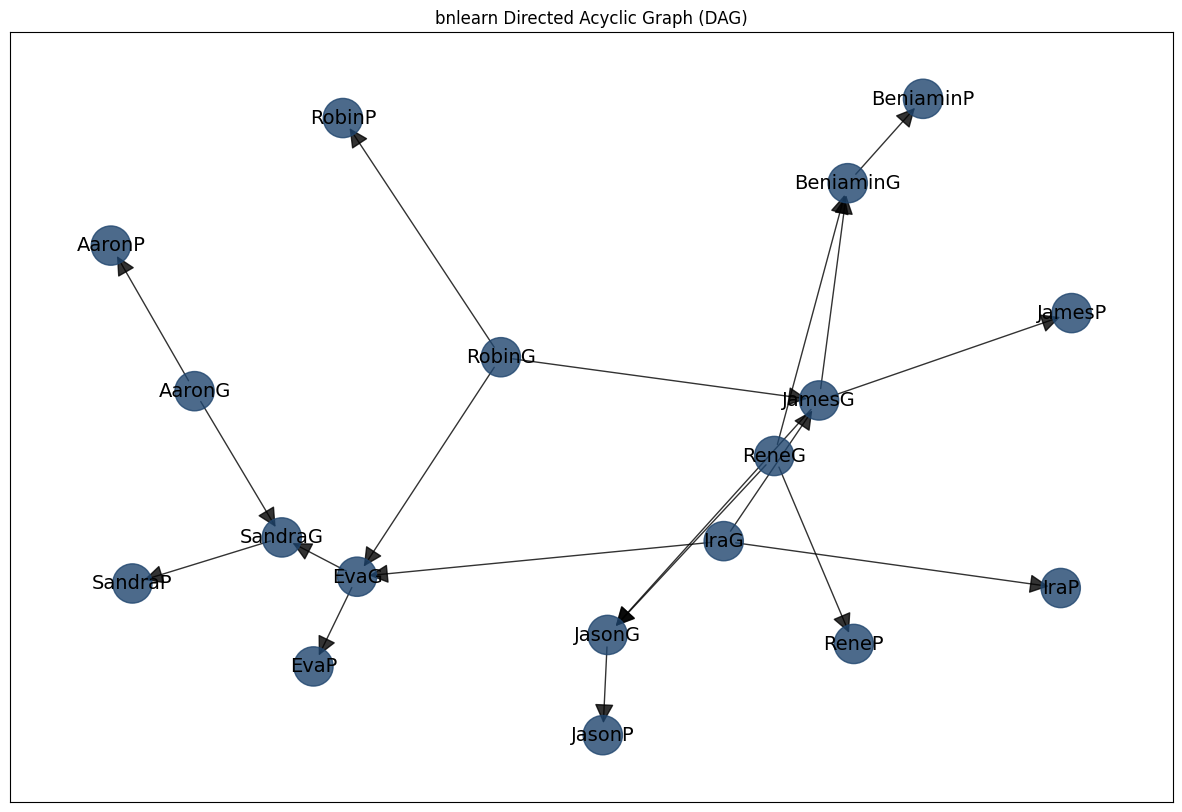

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'RobinG': array([-0.17135146,  0.24697154]),
  'RobinP': array([-0.49552778,  0.89498856]),
  'IraG': array([ 0.28603375, -0.25131099]),
  'IraP': array([ 0.97764409, -0.37834553]),
  'EvaG': array([-0.46641367, -0.34768883]),
  'EvaP': array([-0.55593024, -0.59076006]),
  'AaronG': array([-0.79993256,  0.15498242]),
  'AaronP': array([-0.97166353,  0.54943924]),
  'SandraG': array([-0.62085848, -0.24126167]),
  'SandraP': array([-0.92753274, -0.36600713]),
  'JamesG': array([0.48176059, 0.12984108]),
  'JamesP': array([1.        , 0.36656677]),
  'ReneG': array([ 0.38971791, -0.02065011]),
  'ReneP': array([ 0.55294204, -0.52985278]),
  'JasonG': array([ 0.04762426, -0.50544402]),
  'JasonP': array([ 0.03786333, -0.77703628]),
  'BeniaminG': array([0.54056701, 0.71845924]),
  'BeniaminP': array([0.69505747, 0.94710852])},
 'G': <networkx.classes.digraph.DiGraph at 0x7b3ab515d180>,
 'node_

In [ ]:
edges = [('RobinG','RobinP'),
         ('IraG','IraP'),
         ('EvaG','EvaP'),
         ('AaronG','AaronP'),
         ('RobinG','EvaG'),
         ('IraG','EvaG'),
         ('SandraG','SandraP'),
         ('AaronG','SandraG'),
         ('EvaG','SandraG'),
         ('JamesG','JamesP'),
         ('ReneG','ReneP'),
         ('RobinG','JamesG'),
         ('IraG','JamesG'),
         ('JasonG','JasonP'),
         ('BeniaminG','BeniaminP'),
         ('JamesG','JasonG'),
         ('JamesG','BeniaminG'),
         ('ReneG','JasonG'),
         ('ReneG','BeniaminG'),
         ]

DAG = bnlearn.make_DAG(edges)
bnlearn.plot(DAG)

Wierzchołki o nazwie zakończonej literą G oznaczają genotyp danej osoby (0 to FF, 1 to Ff, zaś 2 to ff), natmiast zakończone literą P oznaczają czy dana osoba ma daną chrobę genetyczną (0: chora, 1: zdrowa).
Oczywiście sam graf to za mało, musimy utworzyć tabele prawdopodobieństw dla poszczególnych wierzchołków

In [ ]:
#Tabele prawdopodobieństw dla genotypów i możliwości zachorowań

cpt_IraG = TabularCPD(variable='IraG', variable_card=3, values=[[0.01],
                                                                [0.18],
                                                                [0.81]])
cpt_RobinG = TabularCPD(variable='RobinG', variable_card=3, values=[[0.01],
                                                                    [0.18],
                                                                    [0.81]])
cpt_AaronG = TabularCPD(variable='AaronG', variable_card=3, values=[[0.01],
                                                                    [0.18],
                                                                    [0.81]])
cpt_ReneG = TabularCPD(variable='ReneG', variable_card=3, values=[[0.01],
                                                                  [0.18],
                                                                  [0.81]])
cpt_EvaG = TabularCPD(variable='EvaG', variable_card=3,
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['RobinG','IraG'], evidence_card=[3,3]
                      )
cpt_SandraG = TabularCPD(variable='SandraG', variable_card=3,
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['AaronG','EvaG'], evidence_card=[3,3]
                      )
cpt_JamesG = TabularCPD(variable='JamesG', variable_card=3,
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['RobinG','IraG'], evidence_card=[3,3]
                      )
cpt_JasonG = TabularCPD(variable='JasonG', variable_card=3,
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['JamesG','ReneG'], evidence_card=[3,3]
                      )
cpt_BeniaminG = TabularCPD(variable='BeniaminG', variable_card=3,
                      values=[[1.00,0.50,0.00,0.50,0.25,0.00,0.00,0.00,0.00],
                              [0.00,0.50,1.00,0.50,0.50,0.50,1.00,0.50,0.00],
                              [0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.50,1.00]],
                      evidence=['JamesG','ReneG'], evidence_card=[3,3]
                      )
cpt_IraP = TabularCPD(variable='IraP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['IraG'],evidence_card=[3])
cpt_RobinP = TabularCPD(variable='RobinP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['RobinG'],evidence_card=[3])
cpt_EvaP = TabularCPD(variable='EvaP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['EvaG'],evidence_card=[3])
cpt_AaronP = TabularCPD(variable='AaronP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['AaronG'],evidence_card=[3])
cpt_SandraP = TabularCPD(variable='SandraP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['SandraG'],evidence_card=[3])
cpt_JamesP = TabularCPD(variable='JamesP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['JamesG'],evidence_card=[3])
cpt_ReneP = TabularCPD(variable='ReneP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['ReneG'],evidence_card=[3])
cpt_JasonP = TabularCPD(variable='JasonP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['JasonG'],evidence_card=[3])
cpt_BeniaminP = TabularCPD(variable='BeniaminP', variable_card=2,
                      values=[[0.8,0.6,0.1],
                              [0.2,0.4,0.9]],
                      evidence=['BeniaminG'],evidence_card=[3])


i podpiąć je do naszego grafu.

In [ ]:
DAG = bnlearn.make_DAG(DAG,CPD=[cpt_IraG,cpt_RobinG,cpt_EvaG,cpt_AaronG,cpt_SandraG,cpt_JamesG,cpt_ReneG,cpt_JasonG,cpt_BeniaminG,
                                cpt_IraP,cpt_RobinP,cpt_EvaP,cpt_AaronP,cpt_SandraP,cpt_JamesP,cpt_ReneP,cpt_JasonP,cpt_BeniaminP])

Możemy teraz wypisać wszystkie tabele prawdopodobieństw jakie pojawiają się w naszym grafie

In [ ]:
bnlearn.print_CPD(DAG)

Teraz możemy wnioskować jakie są prawdopodobieństwa różnych zajść na podstawie naszej wiedzy. Poniżej mamy przykład jak sprawdzić prawdopodobieństwo zachorowania Sandry, kiedy nie mamy żadnych informacji

In [ ]:
q1 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+-------+
|    |   SandraP |     p |
+====+===========+=======+
|  0 |         0 | 0.197 |
+----+-----------+-------+
|  1 |         1 | 0.803 |
+----+-----------+-------+


W ramach ćwiczeń proszę sprawdzić jakie są szanse aby:

1.   Sandra zachorowała jeżeli jej ciocia Rene zachorowała
2.   Sandra zachorowała jeżeli jej rodzice zachorowali
3.   Sandra zachorowała jeżeli jej rodzice mają genotyp FF i Ff
4.   Sandra zachorowała jeżeli obaj jej kuzyni Jason i Beniamin nie zachorowali
5.   Ira zachorowała jeżeli Sandra zachorowała



In [ ]:
#miejsce na odpowiednie zapytania
result1 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'ReneP': 0.0})
print("P(Sandra zachorowala | Rene zachorowala):", result1.values[1])
# P(Sandra zachorowala | Rene zachorowala): 0.803

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+-------+
|    |   SandraP |     p |
+====+===========+=======+
|  0 |         0 | 0.197 |
+----+-----------+-------+
|  1 |         1 | 0.803 |
+----+-----------+-------+
P(Sandra zachorowala | Rene zachorowala): 0.803


In [ ]:
# w P jest info o chorobie 0: chora, 1: zdrowa
# w G jest info o genotypie FF -> 0 to FF, 1 to Ff, zaś 2 to ff


# 1. Sandra zachorowała jeżeli jej ciocia Rene zachorowała
result1 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'ReneP': 0})
print("P(Sandra zachorowala | Rene zachorowala):", result1.values[0])

# 2. Sandra zachorowała jeżeli jej rodzice zachorowali
result2 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'EvaP': 0, 'AaronP': 0})
print("P(Sandra zachorowala | rodzice zachorowali):", result2.values[0])

# 3. Sandra zachorowała jeżeli jej rodzice mają genotyp FF i Ff
result3 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'EvaG': 0, 'AaronG': 1})
print("P(Sandra zachorowala | rodzice maja genotyp FF i Ff):", result3.values[0])

# 4. Sandra zachorowała jeżeli obaj jej kuzyni Jason i Beniamin nie zachorowali
result4 = bnlearn.inference.fit(DAG, variables=['SandraP'], evidence={'JasonP': 1, 'BeniaminP': 1})
print("P(Sandra zachorowala | obaj kuzyni nie zachorowali):", result4.values[0])

# 5. Ira zachorowała jeżeli Sandra zachorowała
result5 = bnlearn.inference.fit(DAG, variables=['IraP'], evidence={'SandraP': 0})
print("P(Ira zachorowala | Sandra zachorowala):", result5.values[1])

print("1. P(Sandra zachorowala | Rene zachorowala):", result1.values[0])
print("2. P(Sandra zachorowala | rodzice zachorowali):", result2.values[0])
print("3. P(Sandra zachorowala | rodzice maja genotyp FF i Ff):", result3.values[0])
print("4. P(Sandra zachorowala | obaj kuzyni nie zachorowali):", result4.values[0])
print("5. P(Ira zachorowala | Sandra zachorowala):", result5.values[0])


[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+-------+
|    |   SandraP |     p |
+====+===========+=======+
|  0 |         0 | 0.197 |
+----+-----------+-------+
|  1 |         1 | 0.803 |
+----+-----------+-------+
P(Sandra zachorowala | Rene zachorowala): 0.197
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+----------+
|    |   SandraP |        p |
+====+===========+==========+
|  0 |         0 | 0.385006 |
+----+-----------+----------+
|  1 |         1 | 0.614994 |
+----+-----------+----------+
P(Sandra zachorowala | rodzice zachorowali): 0.3850060552964518
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------+-----+
|    |   SandraP |   p |
+====+===========+=====+
|  0 |

1. P(Sandra zachorowala | Rene zachorowala): 0.197
2. P(Sandra zachorowala | rodzice zachorowali): 0.3850060552964518
3. P(Sandra zachorowala | rodzice maja genotyp FF i Ff): 0.7
4. P(Sandra zachorowala | obaj kuzyni nie zachorowali): 0.18622367454800523
5. P(Ira zachorowala | Sandra zachorowala): 0.24745939086294413